In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./saved/out_nlp_.csv", delimiter="\t")

In [3]:
df1 = pd.read_csv("./saved/n_out_nlp__wikidata.csv", delimiter="\t")

In [ ]:
df.tail(5)

In [ ]:
df1.head(5)

### Filtering the dataframe

In [4]:
df = df[df["def words"] != "-"]

In [5]:
n_df1 = df1[df1["label"].isin(df["title"])]
n_df1.head(2)

,title,label,type
1,Q17,Japan,Q3624078|Q112099|Q6256
2,Q18,South America,Q5107|Q855697


In [6]:
n_df = df[df.title.isin(df1["label"])]
n_df.head(2)

,title,type,def words,infobox_name,infobox,categories,wikilinks
3,A,article,first|letter,-,-,ISO basic Latin letters|Vowel letters,A#Related characters|Latin script|Alphabet|Log...
4,Alabama,article,state,Infobox U.S. state,official_name:State of Alabama|name:Alabama|im...,Alabama|1819 establishments in the United Stat...,Coat of arms of Alabama|Northern flicker|Dixie...


### Getting the categories (or types, eg. human, etc)

In [ ]:
cat = set()
for i in df1["type"]:
    cat.update(str(i).split("|"))

In [ ]:
categories = df1[df1.title.isin(cat)]

In [ ]:
categories

In [ ]:
df1[df1["title"] == "Q89934"]

# Organizing data

In [9]:
from collections import defaultdict

s_data = {}
for i, row in n_df.iterrows():
    # tmp = categories[categories["title"] == n_df1[n_df1["title"] == row["title"]]["type"]]

    tmp = n_df1[n_df1["label"] == row["title"]]["type"].iloc[0].split("|")
    for t in tmp:
        if t not in s_data:
            s_data[t] = defaultdict(int)
        
        for word in row["def words"].split("|"):
            s_data[t][word] += 1

In [13]:
s_data["Q5"] #human

defaultdict(int,
            {'lawyer': 9,
             'statesman': 19,
             'american': 234,
             'Greek': 20,
             'polymath': 9,
             'philosopher': 46,
             'writer': 35,
             'retire': 11,
             'tennis': 4,
             'professional': 16,
             'player': 11,
             'world': 1,
             'english': 49,
             'german': 62,
             'theoretical': 7,
             'bear': 16,
             'physicist': 30,
             'king': 12,
             'producer': 28,
             'director': 32,
             'regard': 2,
             'film': 32,
             'artist': 12,
             'screenwriter': 14,
             'japanese': 8,
             'personality': 5,
             'russian': 13,
             'former': 18,
             'mathematician': 39,
             'Minister': 5,
             'french': 44,
             'journalist': 5,
             'algerian': 1,
             'grandmaster': 3,
             'chess

In [1]:
import json

json.dump(s_data, open("./saved/teste_.json", "w"))

NameError: name 's_data' is not defined

# statistics

In [2]:
import json

s_data = json.load(open("./saved/word_count.json", "r"))

In [3]:
def lookup(word):
    tmp_dict = {}
    word = word.lower()
    for k in s_data:
        if word in s_data[k]:
            tmp_dict[k] = s_data[k][word]
    
    return {k: v for k, v in sorted(tmp_dict.items(), key=lambda item: item[1], reverse=True)}

In [33]:
a = lookup("norwegian")
a

{'Q5': 10,
 'Q10864048': 2,
 'Q26934845': 2,
 'Q28575': 2,
 'Q23442': 1,
 'Q7278': 1,
 'Q33837': 1}

# Plots

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import Normalize

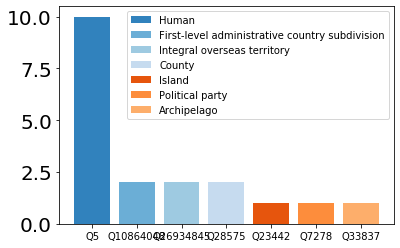

In [12]:
norwegian = lookup("norwegian")
norwegian_norm = [i for i in range(len(norwegian.keys()))]

my_cmap = cm.get_cmap('tab20c')
my_norm = Normalize(vmin=0, vmax=len(norwegian_norm))

labels = ["Human", "First-level administrative country subdivision", "Integral overseas territory", "County", "Island", "Political party", "Archipelago"]

# plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)

# font = {'font.family' : 'normal',
#         'font.weight' : 'normal',
#         'font.size'   : 10}

plt.rc("ytick", labelsize=20)

bar_plt = plt.bar(norwegian.keys(), norwegian.values(), color=my_cmap(norwegian_norm))

plt.legend(bar_plt, labels)
plt.show()

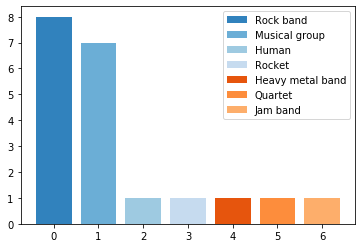

In [63]:
rock = lookup("rock")
rock_norm = [i for i in range(len(rock.keys()))]

my_norm = Normalize(vmin=0, vmax=len(rock_norm))

rock_labels =  ["Rock band", "Musical group", "Human", "Rocket", "Heavy metal band", "Quartet", "Jam band"]

bar_plt = plt.bar(rock_norm, rock.values(), color=my_cmap(rock_norm))
plt.legend(bar_plt, rock_labels)
plt.show()

In [62]:
a = lookup("rock")
a

{'Q5741069': 8,
 'Q215380': 7,
 'Q5': 1,
 'Q2037215': 1,
 'Q56816954': 1,
 'Q1135557': 1,
 'Q2095173': 1}

In [ ]:
df[df.title.str.contains("(?i)scotland")]

In [ ]:
df[df.title.str.contains("(?i)^falmouth")]

In [ ]:
df.loc[6,]["def words"]